In [ ]:
pip install requests

In [ ]:
pip install GoogleNews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
from GoogleNews import GoogleNews
import pandas as pd

googlenews = GoogleNews(lang='es', region='CO')

googlenews.set_time_range('06/03/2024', '07/04/2024')

googlenews.search('turismo "San Andrés Islas" Colombia')

results = googlenews.result()

df = pd.DataFrame(results)

for index, row in df.iterrows():
    print(f"Titulo: {row['title']}")
    print(f"Medio: {row['media']}")
    print(f"Descripción: {row['desc']}")
    print(f"Fecha: {row['date']}")
    print(f"URL: {row['link']}")
    print('-'*50)

df.to_csv('noticias_turismo_san_andres.csv', index=False)

Titulo: San Andrés Islas: así ha cambiado el turismo en el archipiélago en los último años
Medio: MSN
Descripción: Bañarse o sumergirse en el llamado mar de los siete colores es una experiencia única que hace parte de la historia de millones de colombianos.
Fecha: Hace 1 día
URL: https://www.msn.com/es-co/noticias/otras/san-andr%25C3%25A9s-islas-as%25C3%25AD-ha-cambiado-el-turismo-en-el-archipi%25C3%25A9lago-en-los-%25C3%25BAltimo-a%25C3%25B1os/ar-BB1pdagx%3Fitem%3Dflightsprg-tipsubsc-v1a%3Fseason%3D2024/&ved=2ahUKEwjg8sv72Y2HAxUO78kDHW5aAYsQxfQBegQIBRAC&usg=AOvVaw0_4-qWSkIPfXxXcVQENKX9
--------------------------------------------------
Titulo: La iniciativa con la que el Gobierno Petro pretende promover el turismo en San Andrés
Medio: El Colombiano
Descripción: La grave crisis turística que golpea a la isla de San Andrés, con una ocupación hotelera que no supera el 40% este año y una contracción del PIB del -...
Fecha: Hace 3 semanas
URL: https://www.elcolombiano.com/colombia/gobierno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())


                                               title           media  \
0  San Andrés Islas: así ha cambiado el turismo e...             MSN   
1  La iniciativa con la que el Gobierno Petro pre...   El Colombiano   
2  Gobierno promueve atractivos turísticos de San...           Eje21   
3  Turismo en San Andrés: anuncian millonaria inv...       RCN Radio   
4  Ante crisis, San Andrés busca revitalizar el t...  Vanguardia.com   

             date  datetime  \
0      Hace 1 día       NaN   
1  Hace 3 semanas       NaN   
2  Hace 3 semanas       NaN   
3  Hace 4 semanas       NaN   
4      Hace 1 mes       NaN   

                                                desc  \
0  Bañarse o sumergirse en el llamado mar de los ...   
1  La grave crisis turística que golpea a la isla...   
2  San Andrés islas, 11 jun (Prensa Latina) El Mi...   
3  MinComercio anunció que aprobó 17 Proyectos pa...   
4  En un esfuerzo por reactivar el turismo en el ...   

                                           

In [ ]:
pip install GoogleNews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install GoogleNews pandas matplotlib seaborn textblob scikit-learn spacy networkx
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from GoogleNews import GoogleNews
import spacy
import networkx as nx
from itertools import combinations


In [ ]:
googlenews = GoogleNews(lang='es', region='CO')

In [ ]:

import pandas as pd

from GoogleNews import GoogleNews

googlenews = GoogleNews(lang='es', region='CO')

googlenews.set_time_range('06/01/2024', '07/04/2024')

googlenews.search('turismo "San Andrés Islas" Colombia')

results = googlenews.result()

df = pd.DataFrame(results)

print(df)

df.to_csv('noticias_turismo_san_andres.csv', index=False)


                                               title           media  \
0  San Andrés Islas: así ha cambiado el turismo e...             MSN   
1  La iniciativa con la que el Gobierno Petro pre...   El Colombiano   
2  Gobierno promueve atractivos turísticos de San...           Eje21   
3  Turismo en San Andrés: anuncian millonaria inv...       RCN Radio   
4  Ante crisis, San Andrés busca revitalizar el t...  Vanguardia.com   
5  Buscan reactivar el turismo hacia San Andrés I...      Portafolio   
6  ¿No es lo que parece? La versión de Anato por ...      Semana.com   
7  ¿Qué está pasando con el turismo en San Andrés...  Vanguardia.com   
8  Descuentos en tiquetes a San Andrés tras crisi...    Colombia.com   
9  Video causó impacto por vuelo a San Andrés Isl...    ELTIEMPO.com   

             date  datetime  \
0      Hace 1 día       NaN   
1  Hace 3 semanas       NaN   
2  Hace 3 semanas       NaN   
3  Hace 4 semanas       NaN   
4      Hace 1 mes       NaN   
5      Hace 1 mes    

In [ ]:

word_counts = Counter()
for title in df['title']:
  for word in title.split():
    word_counts[word] += 1

most_common_words = word_counts.most_common(10)
print(most_common_words)


[('San', 10), ('el', 10), ('en', 8), ('Andrés', 7), ('turismo', 6), ('de', 5), ('con', 4), ('que', 3), ('vuelo', 3), ('a', 3)]


Number of unique sources: 9
Source counts: media
Vanguardia.com    2
MSN               1
El Colombiano     1
Eje21             1
RCN Radio         1
Portafolio        1
Semana.com        1
Colombia.com      1
ELTIEMPO.com      1
Name: count, dtype: int64


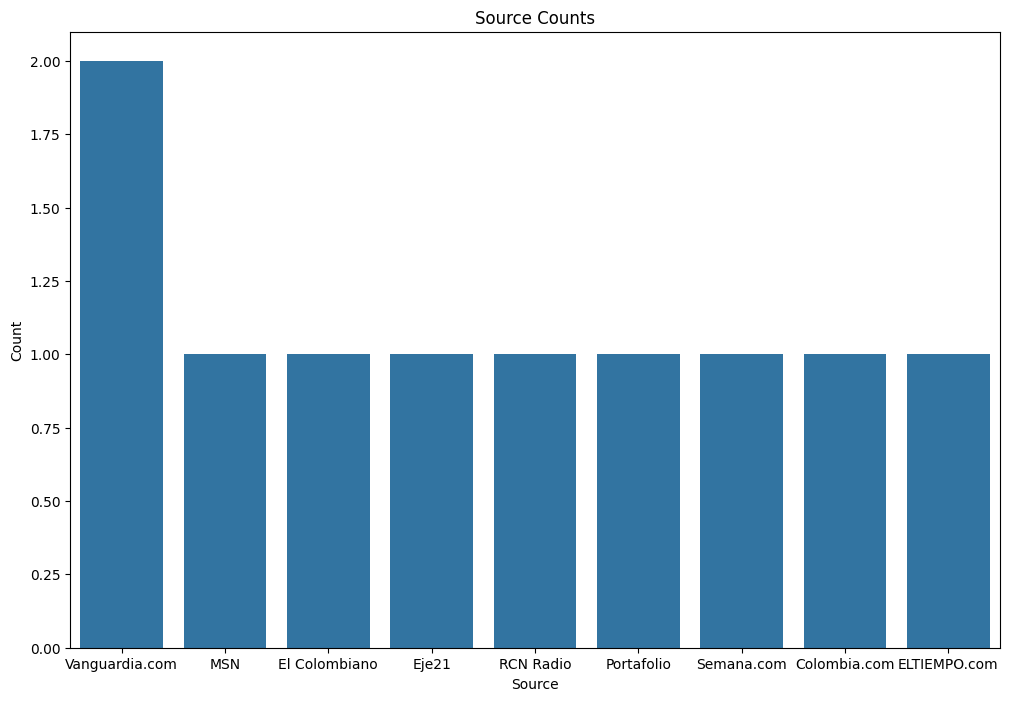

In [ ]:

import matplotlib.pyplot as plt

unique_sources = df['media'].unique()
num_unique_sources = len(unique_sources)

source_counts = df['media'].value_counts()

print(f"Number of unique sources: {num_unique_sources}")
print(f"Source counts: {source_counts}")

plt.figure(figsize=(12, 8))
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Source Counts')
plt.show()


In [ ]:
from datetime import datetime

date_string = "2023-05-12"
date_object = datetime.fromisoformat(date_string)

print(date_object)

2023-05-12 00:00:00


Fecha con más noticias: Hace 1 mes
Number of news articles on that date: 6
Dates with the least news articles: ['Hace 1 día', 'Hace 4 semanas']
Number of news articles on those dates: 1


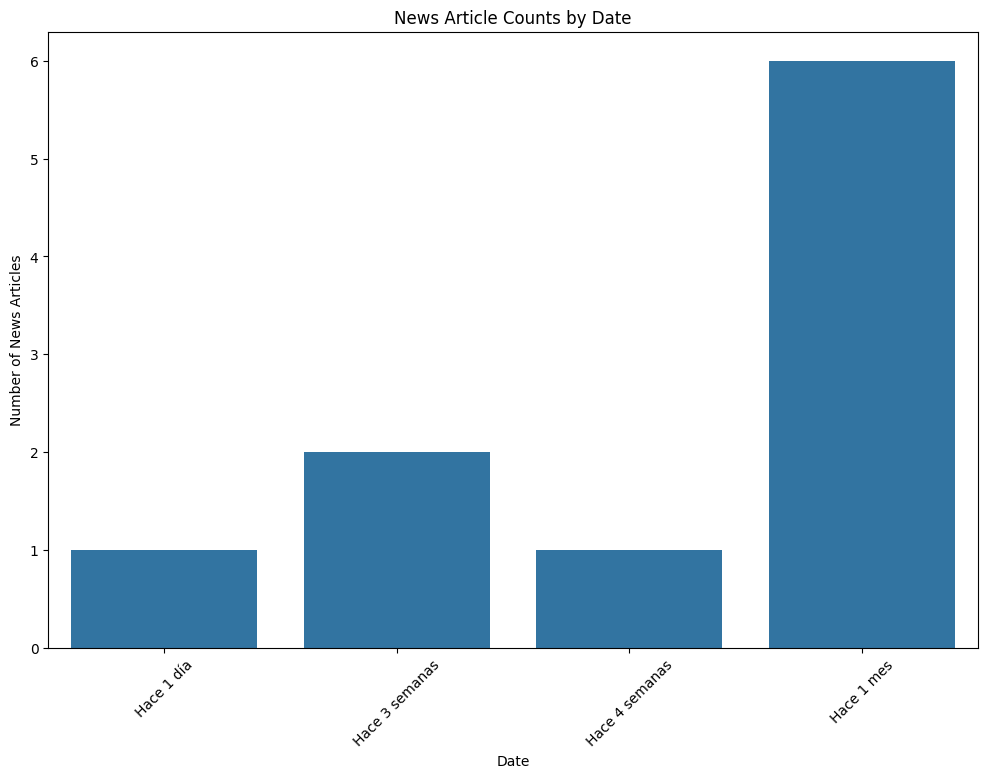

In [ ]:

import matplotlib.pyplot as plt
date_counts = {}

for index, row in df.iterrows():
  date = row['date']


  if date not in date_counts:
    date_counts[date] = 1
  else:
    date_counts[date] += 1

most_news_date = max(date_counts, key=date_counts.get)

print(f"Fecha con más noticias: {most_news_date}")
print(f"Número de noticias en la fecha: {date_counts[most_news_date]}")

least_news_dates = [date for date, count in date_counts.items() if count == min(date_counts.values())]

print(f"Fechas con menos número de artículos: {least_news_dates}")
print(f"Number of news articles on those dates: {min(date_counts.values())}")

plt.figure(figsize=(12, 8))
sns.barplot(x=list(date_counts.keys()), y=list(date_counts.values()))
plt.xlabel('Date')
plt.ylabel('Number of News Articles')
plt.title('News Article Counts by Date')
plt.xticks(rotation=45)
plt.show()


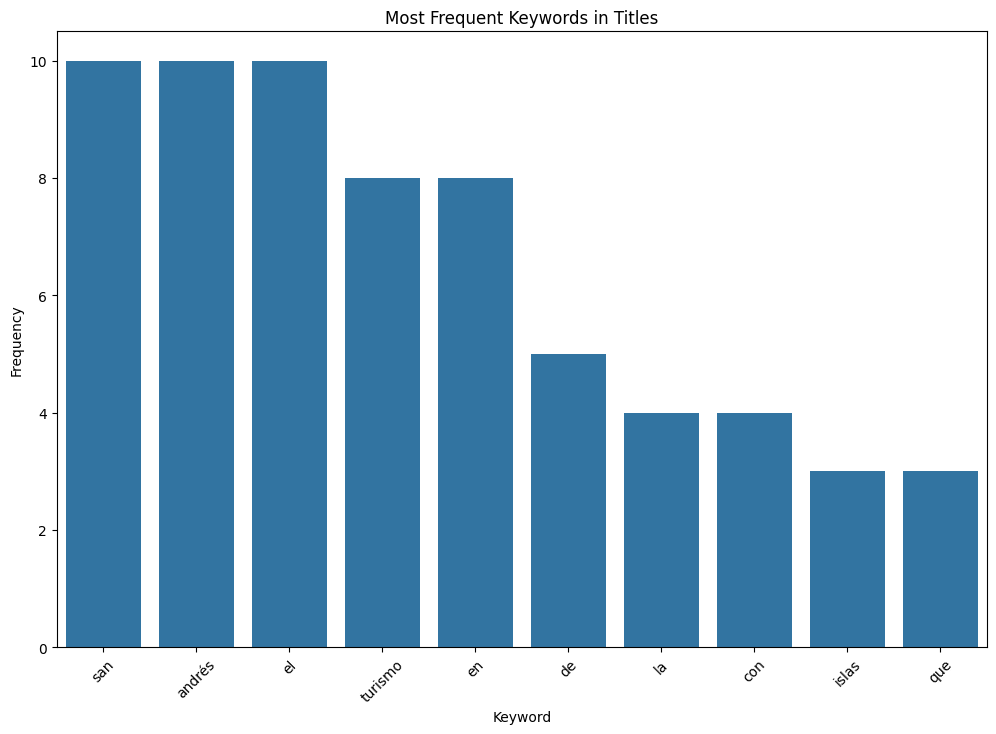

In [ ]:

import matplotlib.pyplot as plt

keywords = []
for title in df['title']:
    keywords.extend(re.findall(r'\b\w+\b', title.lower()))

keyword_counts = Counter(keywords)

most_frequent_keywords = keyword_counts.most_common(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=[k for k, v in most_frequent_keywords], y=[v for k, v in most_frequent_keywords])
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Most Frequent Keywords in Titles')
plt.xticks(rotation=45)
plt.show()


Most frequent named entities:
- San Andrés: 6
- San Andrés Islas: 3
- Gobierno Petro: 1
- Providencia: 1
- Santa Catalina: 1
- ¿No: 1
- Anato: 1
- San Andrés?: 1
- Video: 1


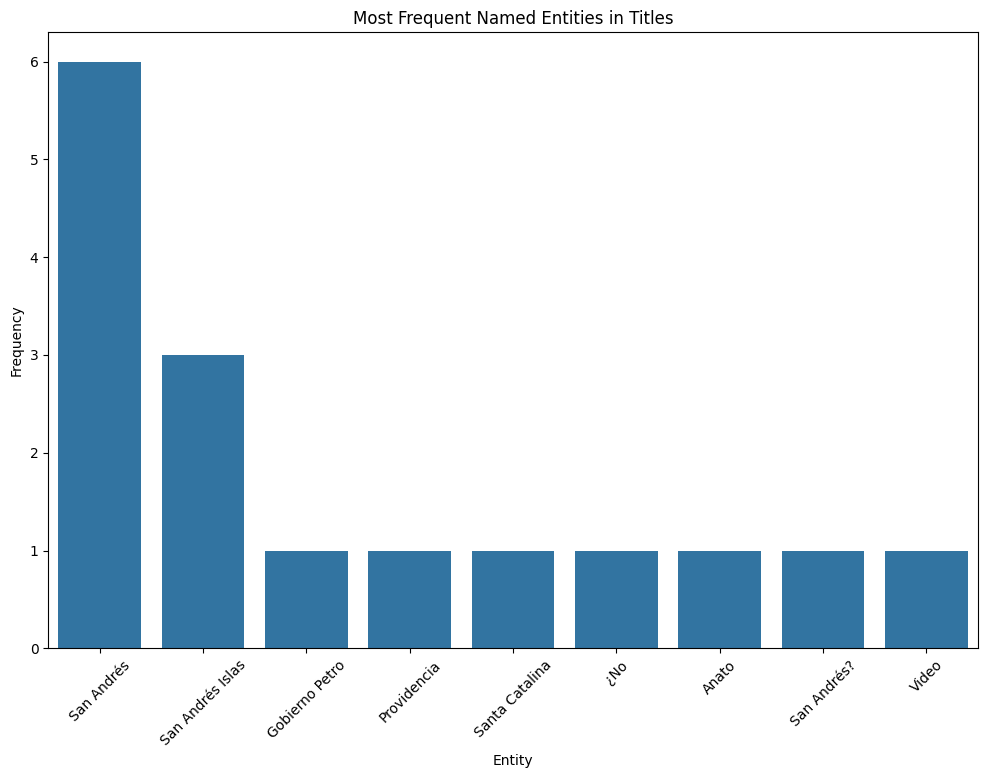

In [ ]:

import matplotlib.pyplot as plt
import spacy

nlp = spacy.load("es_core_news_md")

entities = []
for title in df['title']:
    doc = nlp(title)
    entities.extend([ent.text for ent in doc.ents])

entity_counts = Counter(entities)

most_frequent_entities = entity_counts.most_common(10)

print("Most frequent named entities:")
for entity, count in most_frequent_entities:
    print(f"- {entity}: {count}")

plt.figure(figsize=(12, 8))
sns.barplot(x=[entity for entity, count in most_frequent_entities], y=[count for entity, count in most_frequent_entities])
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.title('Most Frequent Named Entities in Titles')
plt.xticks(rotation=45)
plt.show()


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['desc'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

print("Temas Identificados:")
for i, topic in enumerate(lda.components_):
    print(f'Tema {i+1}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print('\n')

Temas Identificados:
Tema 1:
['mar', 'los', 'llamado', 'es', 'experiencia', 'única', 'del', 'la', 'que', 'una']


Tema 2:
['anunció', 'departamento', 'mincomercio', 'fortalecer', 'la', 'por', 'archipiélago', 'en', 'turismo', 'el']


Tema 3:
['aéreos', 'tiquetes', 'anunciado', 'superar', 'descuentos', 'en', 'del', 'para', 'gobernador', 'la']


Tema 4:
['muestra', 'desde', 'indignado', 'turismo', 'las', 'andrés', 'video', 'islas', 'san', 'en']


Tema 5:
['turismo', 'que', 'para', 'crisis', 'isla', 'en', 'la', 'el', 'san', 'andrés']




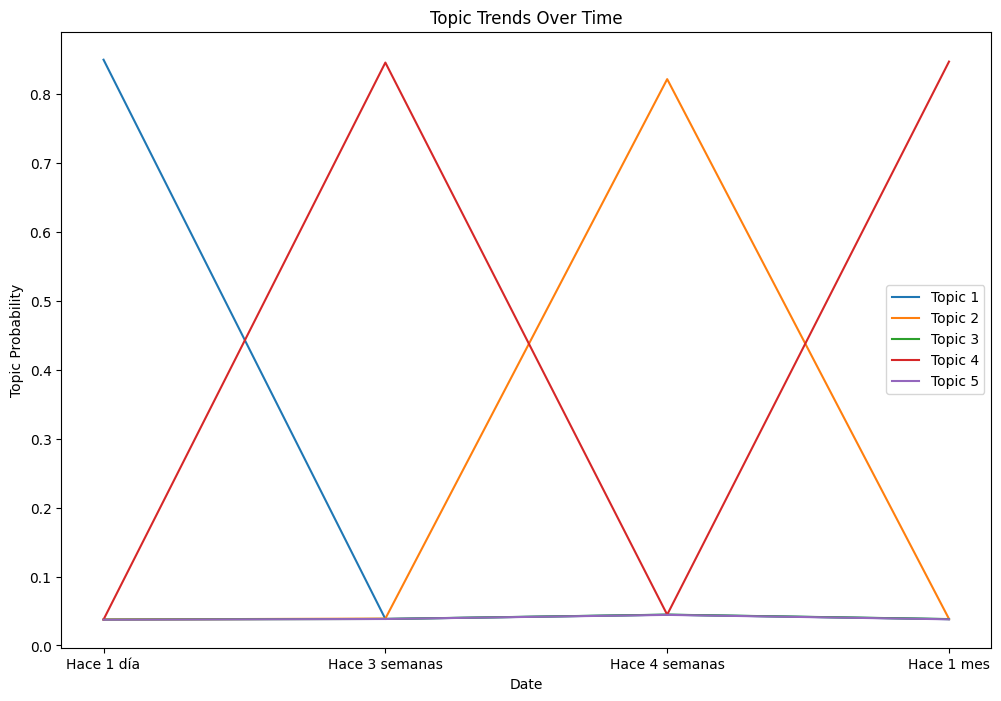

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
date_topic_matrix = pd.DataFrame(columns=[f"Topic {i+1}" for i in range(lda.n_components)])
date_topic_matrix['Date'] = df['date']

for index, row in df.iterrows():
  date = row['date']
  doc = nlp(row['desc'])
  bow = vectorizer.transform([doc.text])
  topic_distribution = lda.transform(bow)[0]
  for topic_index, topic_probability in enumerate(topic_distribution):
    date_topic_matrix.loc[date_topic_matrix['Date'] == date, f"Topic {topic_index+1}"] = topic_probability

plt.figure(figsize=(12, 8))
for topic_index in range(lda.n_components):
  plt.plot(date_topic_matrix['Date'], date_topic_matrix[f"Topic {topic_index+1}"], label=f"Topic {topic_index+1}")
plt.xlabel('Date')
plt.ylabel('Topic Probability')
plt.title('Topic Trends Over Time')
plt.legend()
plt.show()
